In [1]:
import os
import torch
import pandas as pd
import numpy as np
import sys
import warnings
from training import train
from params import get_finetune_params
from task_configs.utils import load_task_config
from finetune_utils import seed_torch, get_exp_code, get_splits, get_loader, save_obj
from datasets.slide_datatset import SlideDataset
sys.path.append(os.path.abspath('../dino_stage2'))
from pprint import pprint

from dino_stage2.wsi_dataset import WSIDataset
from dino_stage2.eval_knn import extract_features
warnings.filterwarnings("ignore")

/home/yuhaowang/anaconda3/envs/gigapath/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/yuhaowang/anaconda3/envs/gigapath/lib/python3.9/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/home/yuhaowang/anaconda3/envs/gigapath/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/yuhaowang/anaconda3/envs/gigapath/lib/python3.9/site-packages/timm/models/registry.py:4: FutureWarning: Importing from timm.models.registry is deprecated, please import via 

In [2]:
import pandas as pd
data=pd.read_csv('/home/yuhaowang/project/FMBC/finetune/TCGA-BRCA gene expression/val_0.csv')

In [4]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', '5S_rRNA', '5_8S_rRNA', '7SK', 'A1BG',
       'A1BG-AS1', 'A1CF', 'A2M', 'A2M-AS1',
       ...
       'ZYG11AP1', 'ZYG11B', 'ZYX', 'ZYXP1', 'ZZEF1', 'ZZZ3', 'hsa-mir-1253',
       'hsa-mir-423', 'snoZ196', 'slide_id'],
      dtype='object', length=59430)

In [6]:
labels_keys=['5S_rRNA', '5_8S_rRNA']
labels = data[labels_keys].to_numpy()

In [9]:
import torch
torch.from_numpy(labels[3])

tensor([1.4113, 0.0000], dtype=torch.float64)

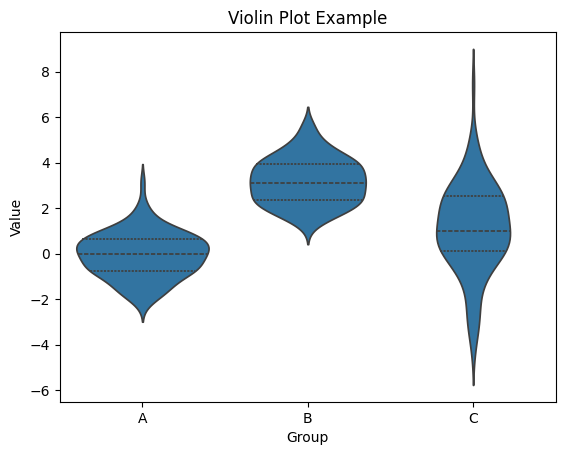

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 示例数据
import pandas as pd
import numpy as np

data = pd.DataFrame({
    "Group": np.repeat(["A", "B", "C"], 100),
    "Value": np.concatenate([
        np.random.normal(0, 1, 100),
        np.random.normal(3, 1, 100),
        np.random.normal(1, 2, 100)
    ])
})

# 绘制小提琴图
sns.violinplot(x="Group", y="Value", data=data, inner="quartile")
plt.title("Violin Plot Example")
plt.show()


In [ ]:
import torch
import numpy as np

# Simulated example: Assume `model` is a pre-trained PyTorch model
# and `dataset` is a PyTorch DataLoader containing the test set.

def evaluate_model(model, dataloader):
    """
    Evaluate the model on the dataloader and return an array of performance metrics for each sample.
    For this example, we will use accuracy as the metric.
    """
    model.eval()
    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            outputs = model(inputs)
            predictions = torch.argmax(outputs, dim=1)  # Assuming classification task
            all_predictions.extend(predictions.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Calculate accuracy per sample
    correct = np.array(all_predictions) == np.array(all_labels)
    return correct.astype(int)  # 1 for correct, 0 for incorrect

def bootstrap_confidence_interval(data, num_bootstrap=1000, ci=95):
    """
    Perform non-parametric bootstrapping to calculate confidence intervals.
    """
    n = len(data)
    bootstrap_means = []

    for _ in range(num_bootstrap):
        # Sample with replacement
        sample = np.random.choice(data, size=n, replace=True)
        bootstrap_means.append(np.mean(sample))

    # Calculate the confidence interval
    lower_percentile = (100 - ci) / 2
    upper_percentile = 100 - lower_percentile
    return np.percentile(bootstrap_means, [lower_percentile, upper_percentile])

# Example usage:
# Assuming `test_loader` is the dataloader for your test dataset
performance_data = evaluate_model(model, test_loader)

# Perform bootstrapping to calculate the 95% confidence interval
ci_95 = bootstrap_confidence_interval(performance_data, num_bootstrap=1000, ci=95)

print(f"95% Confidence Interval for Accuracy: {ci_95}")

# Highlighting the best and second-best models (example workflow)
metrics = {
    "Model A": np.random.uniform(0.7, 0.9, 1000),  # Simulated bootstrap replicates
    "Model B": np.random.uniform(0.6, 0.85, 1000),
    "Model C": np.random.uniform(0.8, 0.95, 1000),
}

# Calculate mean and CI for each model
results = {}
for model_name, data in metrics.items():
    mean = np.mean(data)
    ci = bootstrap_confidence_interval(data, num_bootstrap=1000, ci=95)
    results[model_name] = (mean, ci)

# Identify the best and second-best models
sorted_results = sorted(results.items(), key=lambda x: x[1][0], reverse=True)
best_model = sorted_results[0][0]
second_best_model = sorted_results[1][0]

print("\nModel Performance:")
for model_name, (mean, ci) in results.items():
    display = f"{model_name}: Mean={mean:.3f}, 95% CI={ci}"
    if model_name == best_model:
        display = f"**{display}** (Best)"
    elif model_name == second_best_model:
        display = f"_{display}_ (Second Best)"
    print(display)


In [2]:
import pandas as pd
data=pd.read_csv("/ruiyan/yuhao/project/FMBC/finetune/outputs/BRACS_Coarse/BRACS_COARSE/eval_pretrained_BRACS_COARSE/summary.csv")
show_data = data.transpose()
print(show_data)

EmptyDataError: No columns to parse from file

In [1]:
import os
data_dir = '/ruiyan/yuhao/embedding/TCGA-BRCA'
#TCGA-AR-A1AU-01Z-00-DX1.h5 -> TCGA-AR-A1AU-01.h5
for file in os.listdir(data_dir):
    if file.endswith('.h5'):
        # 获取原始文件路径
        old_file_path = os.path.join(data_dir, file)
        
        # 筛选出前面匹配的部分作为新文件名
        parts = file.split('-')
        if len(parts) >= 4:  # 确保文件名符合预期格式
            new_file_name = '-'.join(parts[:4])[:-1] + '.h5'
            new_file_path = os.path.join(data_dir, new_file_name)
            
            # 重命名文件
            print(new_file_path)
            os.rename(old_file_path, new_file_path)
            print(f'Renamed: {old_file_path} -> {new_file_path}')


/ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A3IY-01.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A3IY-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A3IY-01.h5
/ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A06N-01.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A06N-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A06N-01.h5
/ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A2FK-01.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A2FK-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A2FK-01.h5
/ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A5FL-01.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A5FL-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A5FL-01.h5
/ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A278-01.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A278-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A278-01.h5
/ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A202-01.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A

In [3]:
records = {'val': 3, 'test': 4}
for record_ in records:
    print(record_)
    # for key in records[record_]:
    #     print(key)

val
test


In [1]:
import h5py
def read_assets_from_h5( h5_path: str) -> tuple:
    '''Read the assets from the h5 file'''
    assets = {}
    attrs = {}
    with h5py.File(h5_path, 'r') as f:
        for key in f.keys():
            assets[key] = f[key][:]
            if f[key].attrs is not None:
                attrs[key] = dict(f[key].attrs)
    return assets, attrs
assets,_ = read_assets_from_h5('/ruiyan/yuhao/embedding/BRACS/BRACS_1834.h5')

In [5]:
import torch
images = torch.from_numpy(assets['features'])
coords = torch.from_numpy(assets['coords'])

In [6]:
images.shape, coords.shape

(torch.Size([2533, 768]), torch.Size([2533, 2]))

In [7]:
model = torch.nn.Identity()
    # set up the model

model = model.to('cuda')

: 

In [24]:
import pandas as pd
data=pd.read_csv('/ruiyan/yuhao/project/FMBC/finetune/dataset_csv/biomarker/BCNB_ER.csv')

In [5]:
import pandas as pd
data =pd.read_csv('/ruiyan/yuhao/project/FMBC/finetune/dataset_csv/biomarker/BCNB_PR.csv')

In [8]:
data
data.drop(columns=['Unnamed: 0.1','Unnamed: 0'], inplace=True)
data.to_csv('/ruiyan/yuhao/project/FMBC/finetune/dataset_csv/biomarker/BCNB_PR.csv', index=False)

In [4]:

data.drop(columns=['dir','case_id'], inplace=True)
data['slide_id']=data['slide_id'].apply(lambda x: 'bcnb_'+str(x))
#rename columns
data.rename(columns={'ALN status':'label'},inplace=True)
data.to_csv('/ruiyan/yuhao/project/FMBC/finetune/dataset_csv/biomarker/BCNB_PR.csv')

In [17]:
embedding_dir='/ruiyan/yuhao/embedding/BCNB'
import os
for file in os.listdir(embedding_dir):
    #rename file
    if file.endswith('.h5'):
        old_name = os.path.join(embedding_dir, file)
        new_name = os.path.join(embedding_dir, 'bcnb_'+file)
        os.rename(old_name, new_name)
    

In [1]:
import pandas as pd
data=pd.read_csv('/ruiyan/yuhao/project/FMBC/finetune/dataset_csv/expression_prediction/COUNT_Symbol_matrix_transpose_slide_id.csv')

In [6]:
len(data.columns)

59429

In [5]:
data.head()

,Unnamed: 0,5S_rRNA,5_8S_rRNA,7SK,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,...,ZYG11AP1,ZYG11B,ZYX,ZYXP1,ZZEF1,ZZZ3,hsa-mir-1253,hsa-mir-423,snoZ196,slide_id
0,TCGA-C8-A135-01A-11R-A115-07,0.6156,0.0000,0.000,0.0653,0.4448,0.0068,367.1691,0.7305,9.1646,...,0.0,15.3318,339.1418,0.0,8.0379,14.8216,0.0,0.0,0.7332,TCGA-C8-A135-01Z-00-DX1
1,TCGA-B6-A2IU-01A-32R-A18M-07,0.0000,0.0000,0.000,0.1280,1.9721,0.0000,192.1645,0.6511,0.1967,...,0.0,23.4840,102.9329,0.0,9.5198,20.3704,0.0,0.0,0.0000,TCGA-B6-A2IU-01Z-00-DX1
2,TCGA-EW-A1OZ-01A-11R-A144-07,0.4738,0.0000,0.000,0.1256,1.3694,0.0261,220.0638,1.2436,0.3439,...,0.0,7.9379,254.2952,0.0,10.8202,9.0989,0.0,0.0,1.1286,TCGA-EW-A1OZ-01Z-00-DX1
3,TCGA-GM-A2DL-01A-11R-A18M-07,0.0000,0.0000,0.000,0.0502,1.3498,0.0209,271.3061,0.9087,0.0187,...,0.0,15.8578,276.5847,0.0,8.3421,16.6466,0.0,0.0,0.7525,TCGA-GM-A2DL-01Z-00-DX1
4,TCGA-C8-A12X-01A-11R-A115-07,1.0074,183.7589,1.456,0.5096,2.7003,0.0125,319.0839,1.0166,0.0335,...,0.0,15.1782,79.7713,0.0,15.6486,6.5075,0.0,0.0,0.0000,TCGA-C8-A12X-01Z-00-DX1


In [13]:
data_dir='/ruiyan/yuhao/embedding/TCGA-BRCA'
import os
for file in os.listdir(data_dir):
    #rename file
    #TCGA-BH-A1FR-01Z-00-DX1.h5 ->TCGA-BH-A1FR-01
    if file.endswith('.h5'):
        old_name = os.path.join(data_dir, file)
        new_name = os.path.join(data_dir, file.split('-')[0]+'-'+file.split('-')[1]+'-'+file.split('-')[2]+'-01'+'.h5')
        os.rename(old_name, new_name)

/tmp/ipykernel_50064/1186264072.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


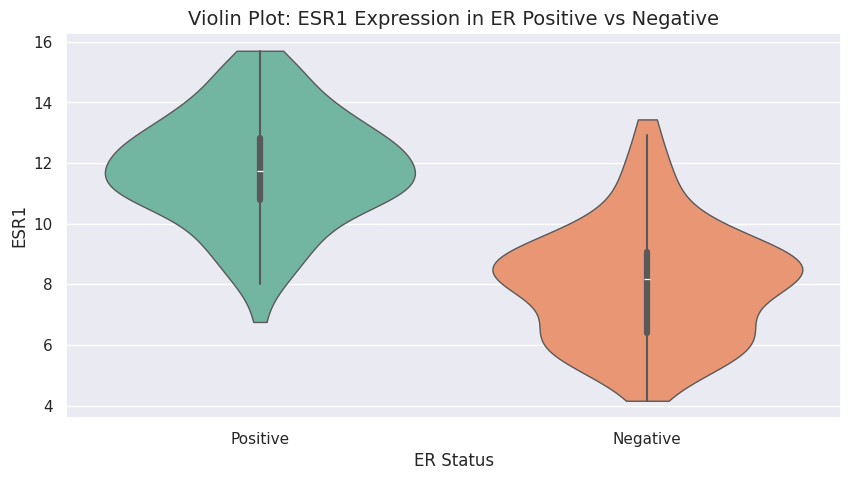

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 创建一个模拟数据集
np.random.seed(42)
data = pd.DataFrame({
    "ER_Status": ["Positive"] * 100 + ["Negative"] * 100,
    "ESR1": np.concatenate([
        np.random.normal(12, 2, 100),  # Positive类别的值
        np.random.normal(8, 2, 100)   # Negative类别的值
    ])
})

# 设置图表风格
sns.set(style="darkgrid")

# 创建子图
plt.figure(figsize=(10, 5))

# 小提琴图
sns.violinplot(
    x="ER_Status",  # X轴分组
    y="ESR1",       # Y轴数值
    data=data,      # 数据集
    palette="Set2", # 配色
    cut=0,          # 不显示超出数据范围的密度部分
    linewidth=1     # 小提琴的边框宽度
)

# 添加标题和坐标轴标签
plt.title("Violin Plot: ESR1 Expression in ER Positive vs Negative", fontsize=14)
plt.xlabel("ER Status", fontsize=12)
plt.ylabel("ESR1", fontsize=12)

# 显示图表
plt.show()


In [1]:
import pandas as pd
data = pd.read_csv('/ruiyan/yuhao/project/FMBC/finetune/dataset_csv/biomarker/BRCA_molecular_subtyping.csv')

In [3]:
data.drop(columns=['dir','slide_id'], inplace=True)
data

,case_id,label
0,TCGA-AN-A0FL-01Z-00-DX1.20A041C6-A306-4599-A7D...,Basal
1,TCGA-A1-A0SK-01Z-00-DX1.A44D70FA-4D96-43F4-9DD...,Basal
2,TCGA-BH-A0HL-01Z-00-DX1.972DE96D-51F4-4A2D-B07...,Basal
3,TCGA-BH-A0HN-01Z-00-DX1.4997F641-C593-41F6-82E...,Basal
4,TCGA-BH-A0E0-01Z-00-DX1.01E88024-83DF-4282-ABA...,Basal
...,...,...
529,TCGA-E2-A14Z-01Z-00-DX1.A1344A78-1842-4578-8CD...,LumA
530,TCGA-AR-A1AX-01Z-00-DX1.2389D54F-545E-499E-B39...,LumA
531,TCGA-BH-A0BS-01Z-00-DX1.FEE32127-4D0B-4560-A39...,LumA
532,TCGA-A2-A0CY-01Z-00-DX1.8815F011-317B-4BB7-A48...,Her2


In [6]:
data['case_id'][0]
#'TCGA-AN-A0FL-01Z-00-DX1.20A041C6-A306-4599-A7D1-65032A252AA9' -> TCGA-AN-A0FL-01.h5
data['slide_id']=data['case_id'].apply(lambda x: x.split('-')[0]+'-'+x.split('-')[1]+'-'+x.split('-')[2]+'-01')

In [8]:
data.drop(columns=['case_id'], inplace=True)
data.to_csv('/ruiyan/yuhao/project/FMBC/finetune/dataset_csv/biomarker/BRCA_molecular_subtyping.csv', index=False)

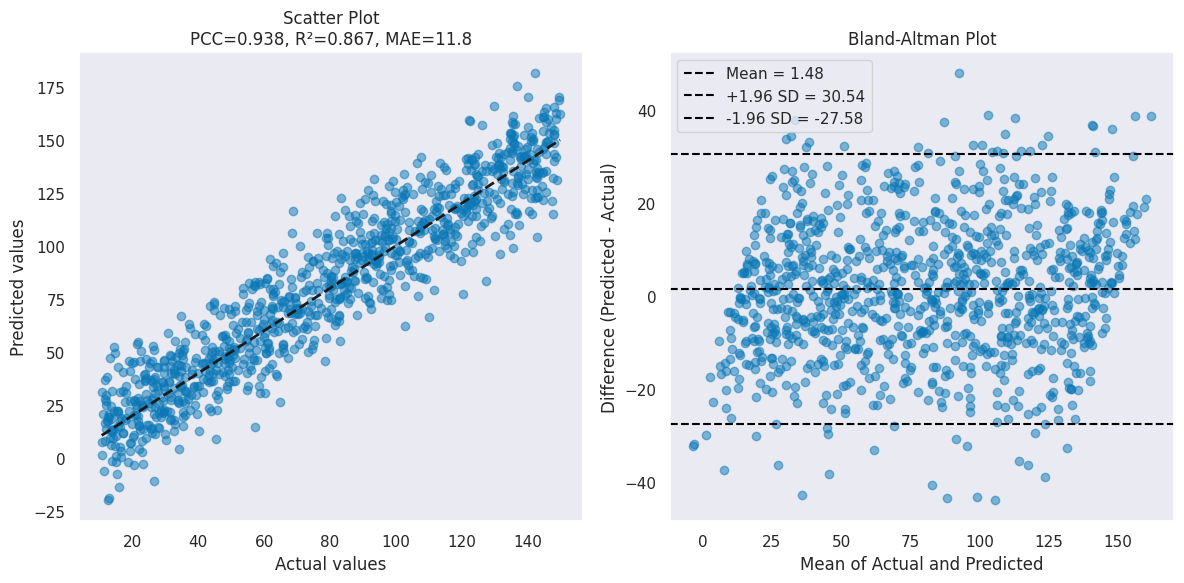

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score
from scipy.stats import pearsonr

# 模拟数据
np.random.seed(42)
actual = np.random.uniform(10, 150, 1000)  # 真实值
predicted = actual + np.random.normal(0, 15, 1000)  # 预测值，加入噪声

# 计算统计指标
pcc, _ = pearsonr(actual, predicted)  # 皮尔森相关系数
r2 = r2_score(actual, predicted)  # 决定系数 R²
mae = mean_absolute_error(actual, predicted)  # 平均绝对误差

# ------------------- 绘制散点图 -------------------
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(actual, predicted, alpha=0.5, color='#0a78b7')
plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'k--', lw=2)  # 对角线
plt.title(f"Scatter Plot\nPCC={pcc:.3f}, R²={r2:.3f}, MAE={mae:.1f}")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.grid()

# ------------------- 绘制 Bland-Altman 图 -------------------
# 计算差值和平均值
mean = (actual + predicted) / 2
diff = predicted - actual
mean_diff = np.mean(diff)
std_diff = np.std(diff)

plt.subplot(1, 2, 2)
plt.scatter(mean, diff, alpha=0.5, color='#0a78b7')
plt.axhline(mean_diff, color='black', linestyle='--', label=f"Mean = {mean_diff:.2f}")
plt.axhline(mean_diff + 1.96 * std_diff, color='black', linestyle='--', label=f"+1.96 SD = {mean_diff + 1.96 * std_diff:.2f}")
plt.axhline(mean_diff - 1.96 * std_diff, color='black', linestyle='--', label=f"-1.96 SD = {mean_diff - 1.96 * std_diff:.2f}")
plt.title("Bland-Altman Plot")
plt.xlabel("Mean of Actual and Predicted")
plt.ylabel("Difference (Predicted - Actual)")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


/tmp/ipykernel_17500/4038574007.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Score', data=df, palette='Set2')


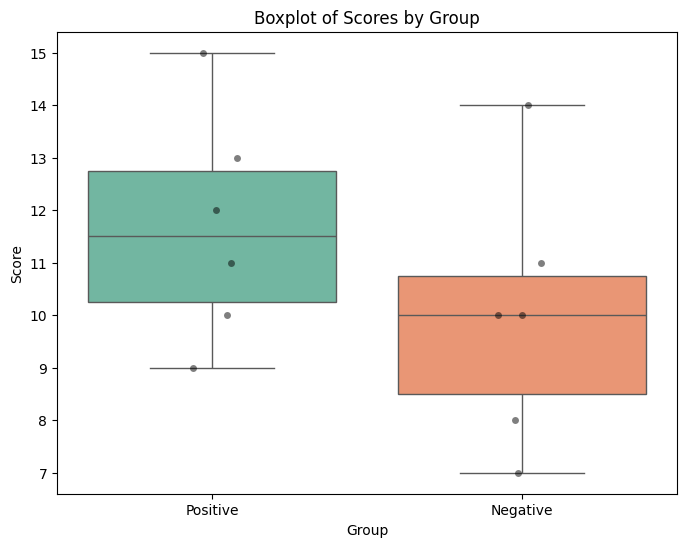

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 示例数据
data = {
    'Score': [10, 11, 12, 10, 13, 14, 9, 8, 15, 7, 11, 10],
    'Group': ['Positive', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative']
}

# 转换为DataFrame
df = pd.DataFrame(data)

# 绘制箱线图
plt.figure(figsize=(8, 6))
sns.boxplot(x='Group', y='Score', data=df, palette='Set2')
sns.stripplot(x='Group', y='Score', data=df, color='black', alpha=0.5, jitter=True)  # 加入数据点
plt.title('Boxplot of Scores by Group')
plt.ylabel('Score')
plt.xlabel('Group')
plt.show()


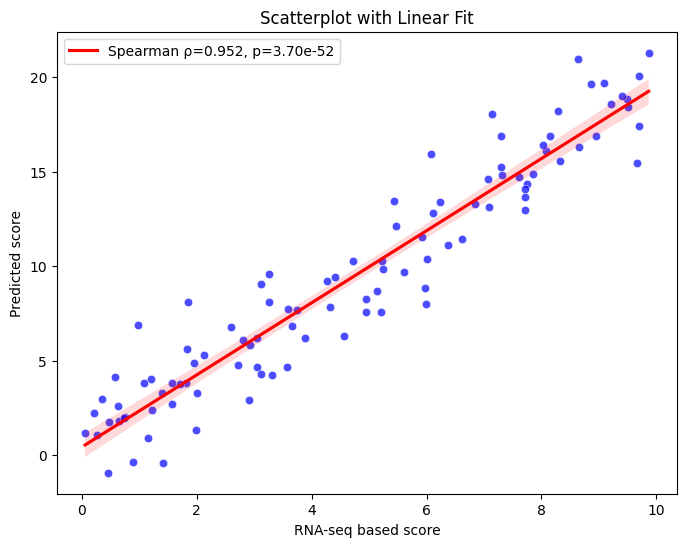

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# 示例数据
np.random.seed(42)
x = np.random.rand(100) * 10  # RNA-seq based score
y = 2 * x + np.random.normal(0, 2, 100)  # Predicted score with noise

# 创建DataFrame
df = pd.DataFrame({'RNA_seq_score': x, 'Predicted_score': y})

# 计算Spearman相关性
rho, p_value = spearmanr(df['RNA_seq_score'], df['Predicted_score'])

# 绘制散点图和拟合线
plt.figure(figsize=(8, 6))
sns.scatterplot(x='RNA_seq_score', y='Predicted_score', data=df, color='blue', alpha=0.7)
sns.regplot(x='RNA_seq_score', y='Predicted_score', data=df, scatter=False, color='red', label=f"Spearman ρ={rho:.3f}, p={p_value:.2e}")
plt.title('Scatterplot with Linear Fit')
plt.xlabel('RNA-seq based score')
plt.ylabel('Predicted score')
plt.legend()
plt.show()


In [2]:
import pandas as pd
data = pd.read_csv('/ruiyan/yuhao/project/FMBC/finetune/dataset_csv/expression_prediction/TCGA-Genexp.csv')
slide_id = data['slide_id']
#exclued data['slide_id']
data.drop(columns=['slide_id'], inplace=True)
#nomalize data by column
data = (data - data.mean()) / data.std()
#concat data
data = pd.concat([slide_id, data], axis=1)


In [4]:
data.to_csv('/ruiyan/yuhao/project/FMBC/finetune/dataset_csv/expression_prediction/TCGA-Genexp.csv', index=False)

In [ ]:
import torch
from torch import nn
from einops import repeat
from models.TransMIL import TransMIL
# 假设 Transformer 类已定义或导入
class Transformer(nn.Module):
    def __init__(self, dim, depth, heads, dim_head, mlp_dim, norm_layer, dropout):
        super().__init__()
        self.layers = nn.ModuleList([
            nn.TransformerEncoderLayer(
                dim, heads, mlp_dim, dropout, batch_first=True
            )
            for _ in range(depth)
        ])
    
    def forward(self, x, mask=None):
        for layer in self.layers:
            x = layer(x, src_key_padding_mask=mask)
        return x

# 创建 TransMIL 实例
model = TransMIL(
    num_classes=3, input_dim=768, dim=512, depth=2, heads=8,
    dim_head=64, mlp_dim=2048, pool='cls', dropout=0.1, emb_dropout=0.1
)

# 输入张量 (batch_size=4, num_instances=10, input_dim=768)
x = torch.randn(4, 10, 768)
lens = torch.tensor([10, 8, 6, 10])

# 前向传播
output = model(x, lens)

# 输出结果
print("输出形状:", output.shape)


输出形状: torch.Size([4, 3])


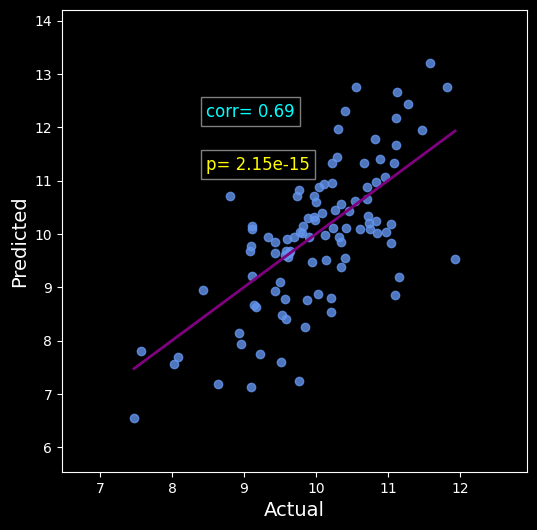

: 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# 示例数据（请用真实数据替换）
actual = np.random.normal(10, 1, 100)  # 实际值
predicted = actual + np.random.normal(0, 1, 100)  # 预测值（带有噪声）

# 计算相关系数和 p 值
corr, p_value = pearsonr(actual, predicted)

# 绘制散点图
plt.style.use('dark_background')  # 设置深色背景
plt.figure(figsize=(6, 6))
plt.scatter(actual, predicted, color='cornflowerblue', alpha=0.8)

# 绘制 y=x 的参考线
x = np.linspace(min(actual), max(actual), 100)
plt.plot(x, x, color='purple', linestyle='-', linewidth=2)

# 添加文本框显示 corr 和 p 值
plt.text(min(actual) + 1, max(predicted) - 1, f'corr= {corr:.2f}', 
         fontsize=12, color='cyan', bbox=dict(facecolor='black', alpha=0.5))
plt.text(min(actual) + 1, max(predicted) - 2, f'p= {p_value:.2e}', 
         fontsize=12, color='yellow', bbox=dict(facecolor='black', alpha=0.5))

# 设置坐标轴标签
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted', fontsize=14)

# 调整坐标范围
plt.xlim(min(actual) - 1, max(actual) + 1)
plt.ylim(min(predicted) - 1, max(predicted) + 1)

plt.show()


In [10]:
import pandas as pd
data = pd.read_csv('/ruiyan/yuhao/project/FMBC/finetune/outputs/TCGA-BRCA-Gene-Exp/FMBC/prediction_results/val_predict.csv')

In [12]:
data.columns

Index(['slide_id', 'val_prob_UBE2T', 'val_prob_PTTG1', 'val_prob_PGR',
       'val_prob_MKI67', 'val_prob_MIA', 'val_prob_MAPT', 'val_prob_KRT17',
       'val_prob_KRT14', 'val_prob_KIF2C',
       ...
       'val_label_MDM2', 'val_label_MELK', 'val_label_MLPH', 'val_label_MYBL2',
       'val_label_MYC', 'val_label_PHGDH', 'val_label_SLC39A6',
       'val_label_NUF2', 'val_label_ORC6', 'val_label_NDC80'],
      dtype='object', length=101)

In [23]:
for i in data.columns:
    print(i)

slide_id
val_prob_UBE2T
val_prob_PTTG1
val_prob_PGR
val_prob_MKI67
val_prob_MIA
val_prob_MAPT
val_prob_KRT17
val_prob_KRT14
val_prob_KIF2C
val_prob_ESR1
val_prob_CCNE1
val_prob_CENPF
val_prob_CEP55
val_prob_FGFR4
val_prob_MMP11
val_prob_SFRP1
val_prob_TMEM45B
val_prob_TYMS
val_prob_ERBB2
val_prob_BCL2
val_prob_CCNB1
val_prob_CDC20
val_prob_NAT1
val_prob_RRM2
val_prob_UBE2C
val_prob_ACTR3B
val_prob_ANLN
val_prob_BAG1
val_prob_BIRC5
val_prob_BLVRA
val_prob_CDC6
val_prob_CDH3
val_prob_CXXC5
val_prob_EGFR
val_prob_EXO1
val_prob_FOXA1
val_prob_FOXC1
val_prob_GPR160
val_prob_GRB7
val_prob_KRT5
val_prob_MDM2
val_prob_MELK
val_prob_MLPH
val_prob_MYBL2
val_prob_MYC
val_prob_PHGDH
val_prob_SLC39A6
val_prob_NUF2
val_prob_ORC6
val_prob_NDC80
val_label_UBE2T
val_label_PTTG1
val_label_PGR
val_label_MKI67
val_label_MIA
val_label_MAPT
val_label_KRT17
val_label_KRT14
val_label_KIF2C
val_label_ESR1
val_label_CCNE1
val_label_CENPF
val_label_CEP55
val_label_FGFR4
val_label_MMP11
val_label_SFRP1
val_label_

In [ ]:
'NDC80''MELK'

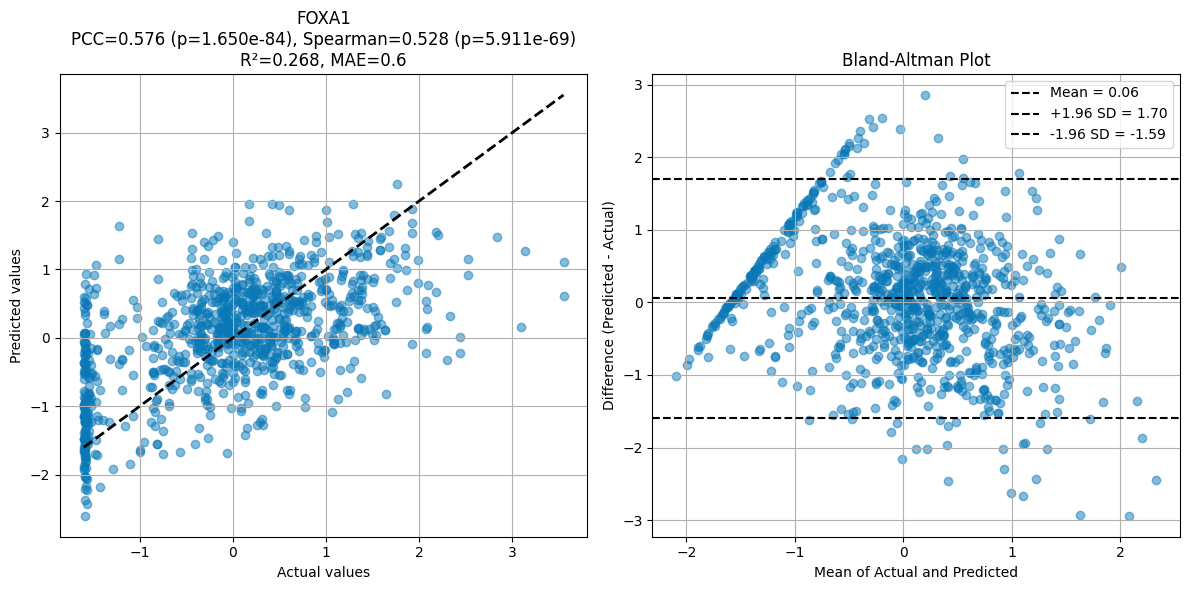

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score
from scipy.stats import pearsonr, spearmanr

test_gene='FOXA1'
np.random.seed(42)
actual = data['val_label_{}'.format(test_gene)].to_numpy()  # 真实值
predicted = data['val_prob_{}'.format(test_gene)].to_numpy()  # 预测值

# 计算统计指标
pcc, p_value_pearson = pearsonr(actual, predicted)  # 皮尔森相关系数及其 P 值
spearman_corr, p_value_spearman = spearmanr(actual, predicted)  # 斯皮尔曼相关系数及其 P 值
r2 = r2_score(actual, predicted)  # 决定系数 R²
mae = mean_absolute_error(actual, predicted)  # 平均绝对误差

# ------------------- 绘制散点图 -------------------
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(actual, predicted, alpha=0.5, color='#0a78b7')
plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'k--', lw=2)  # 对角线
plt.title(f"{test_gene}\n"
          f"PCC={pcc:.3f} (p={p_value_pearson:.3e}), "
          f"Spearman={spearman_corr:.3f} (p={p_value_spearman:.3e})\n"
          f"R²={r2:.3f}, MAE={mae:.1f}")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.grid()

# ------------------- 绘制 Bland-Altman 图 -------------------
# 计算差值和平均值
mean = (actual + predicted) / 2
diff = predicted - actual
mean_diff = np.mean(diff)
std_diff = np.std(diff)

plt.subplot(1, 2, 2)
plt.scatter(mean, diff, alpha=0.5, color='#0a78b7')
plt.axhline(mean_diff, color='black', linestyle='--', label=f"Mean = {mean_diff:.2f}")
plt.axhline(mean_diff + 1.96 * std_diff, color='black', linestyle='--', label=f"+1.96 SD = {mean_diff + 1.96 * std_diff:.2f}")
plt.axhline(mean_diff - 1.96 * std_diff, color='black', linestyle='--', label=f"-1.96 SD = {mean_diff - 1.96 * std_diff:.2f}")
plt.title("Bland-Altman Plot")
plt.xlabel("Mean of Actual and Predicted")
plt.ylabel("Difference (Predicted - Actual)")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


In [9]:
data_dir='/ruiyan/yuhao/project/FMBC/finetune/dataset_csv/subtype/SLNbreast_2subtype.csv'
import pandas as pd
data = pd.read_csv(data_dir)
#Metastatic breast carcinoma
#map Metastatic column: 1 -> positive, 0 -> negative
data['Metastatic breast carcinoma'] = data['Metastatic breast carcinoma'].map({1: 'positive', 0: 'negative'})
#rename data['Metastatic'] to data['label']
data.rename(columns={'Metastatic breast carcinoma': 'label'}, inplace=True)
data.to_csv(data_dir, index=False)

In [8]:
data

,slide_id,Metastatic breast carcinoma
0,HobI16-053768896760,1
1,HobI16-072823783181,1
2,HobI16-105105202254,0
3,HobI16-303757967057,0
4,HobI16-334188031493,0
...,...,...
125,HobI18-711038761484,0
126,HobI18-767451561893,0
127,HobI18-789815111269,1
128,HobI18-796881418672,0


In [ ]:
from scipy.stats import pearsonr, spearmanr
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

class RegressionPlotter:
    '''
    A class to generate regression plots for each category.

    Methods:
    --------
    plot_predictions: Plots actual vs predicted values for a single category.
    plot_all_categories: Plots actual vs predicted values for all categories.
    '''
    def __init__(self):
        pass

    @staticmethod
    def plot_predictions(actual: np.array, predicted: np.array, category_index: int):
        '''
        Plot actual vs. predicted values for a given category.

        Args:
        -----
        actual (np.array): Array of actual values.
        predicted (np.array): Array of predicted values.
        category_index (int): The index of the category being plotted.
        '''
        # Calculate Pearson correlation and p-value
        corr, p_value = pearsonr(actual, predicted)

        # Create scatter plot
        plt.style.use('dark_background')
        plt.figure(figsize=(6, 6))
        plt.scatter(actual, predicted, color='cornflowerblue', alpha=0.8)

        # Plot y=x reference line
        x = np.linspace(min(actual), max(actual), 100)
        plt.plot(x, x, color='purple', linestyle='-', linewidth=2)

        # Add correlation coefficient and p-value as text
        plt.text(min(actual) + 1, max(predicted) - 1, f'corr= {corr:.2f}', 
                 fontsize=12, color='cyan', bbox=dict(facecolor='black', alpha=0.5))
        plt.text(min(actual) + 1, max(predicted) - 2, f'p= {p_value:.2e}', 
                 fontsize=12, color='yellow', bbox=dict(facecolor='black', alpha=0.5))

        # Set labels and title
        plt.xlabel('Actual', fontsize=14)
        plt.ylabel('Predicted', fontsize=14)
        plt.title(f'Category {category_index}: Actual vs Predicted', fontsize=16)

        # Adjust plot limits
        plt.xlim(min(actual) - 1, max(actual) + 1)
        plt.ylim(min(predicted) - 1, max(predicted) + 1)

        plt.show()

    def plot_all_categories(self, labels: np.array, probs: np.array):
        '''
        Plot actual vs. predicted values for all categories.

        Args:
        -----
        labels (np.array): Array of ground truth labels.
        probs (np.array): Array of predicted probabilities.
        '''
        for i in range(labels.shape[1]):
            print(f"Plotting for Category {i}")
            self.plot_predictions(labels[:, i], probs[:, i], category_index=i)

In [3]:
task_cfg_paths = ["task_configs/bracs_coarse.yaml"]*3

In [4]:
task_cfg_paths

['task_configs/bracs_coarse.yaml',
 'task_configs/bracs_coarse.yaml',
 'task_configs/bracs_coarse.yaml']